In [1]:
import pandas as pd
import gzip 
import json
import matplotlib.pyplot as plt
import re
from dateutil import parser
import pyarrow as pa
import pyarrow.parquet as pq

Ingesta de datos

In [2]:
datos_json1 = []
# Abrir el archivo y leer línea por línea
with gzip.open('../json/steam_games.json.gz', 'rt', encoding='utf-8') as f1:
    for linea in f1:
        # Decodificar la línea como un objeto JSON
        datos_linea = json.loads(linea)
        # Agregar el objeto JSON decodificado a la lista
        datos_json1.append(datos_linea)


In [3]:
steam_df = pd.DataFrame(datos_json1)

Tramiento de datos

In [4]:
print(steam_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB
None


In [5]:
steam_df.dropna(how='all', inplace=True) # 64270 entries
# Elimino nulos

In [6]:
steam_df.drop('title', axis=1, inplace=True)
steam_df['publisher'].fillna('Unknown', inplace=True)
steam_df['release_date'].fillna('Unknown', inplace=True)
steam_df['genres'].fillna('[Unknown]', inplace=True)
steam_df['developer'].fillna('Unknown', inplace=True)
steam_df['specs'].fillna('[Unknown]', inplace=True)
steam_df['tags'].fillna('[Unknown]', inplace=True)
steam_df['reviews_url'].fillna('Unknown', inplace=True)
# Remplazo valores nulos y elimino columa duplicada

C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\3836361023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  steam_df['publisher'].fillna('Unknown', inplace=True)
C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\3836361023.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [7]:
# Usar una expresión regular para buscar cualquier variación de 'Free To Play'
pattern = re.compile(r'Free\s*To\s*Play', re.IGNORECASE)
pattern1 = re.compile(r'Starting\s+at\s+\$\d+\.\d+')

# Reemplazar cualquier ocurrencia del patrón con 0
steam_df['price'].replace(pattern, 0, regex=True, inplace=True)
steam_df['price'].replace('Free', 0, regex=True, inplace=True)
steam_df['price'].replace('Install Now', 0, regex=True, inplace=True)
steam_df['price'].replace('Play WARMACHINE: Tactics Demo', 0, regex=True, inplace=True)
steam_df['price'].replace('Install Theme', 0, regex=True, inplace=True)
steam_df['price'].replace('Third-party', 0, regex=True, inplace=True)
steam_df['price'].replace('Play Now', 0, regex=True, inplace=True)
steam_df['price'].replace('Play the Demo', 0, regex=True, inplace=True)
steam_df['price'].replace(pattern1, 499, regex=True, inplace=True)

C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\2064778189.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  steam_df['price'].replace(pattern, 0, regex=True, inplace=True)
C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\2064778189.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [8]:
def convert_date(date_string):
    # Parseamos la fecha utilizando dateutil.parser
    parsed_date = parser.parse(date_string)
    # Formateamos la fecha como 'YYYY-MM-DD'
    return parsed_date.strftime('%Y-%m-%d')

In [9]:
steam_df['release_date'].replace('Soon..', 'Unknown', inplace=True)
steam_df['release_date'].replace('Beta测试已开启', 'Unknown', inplace=True)
steam_df['release_date'].replace('Coming Soon', 'Unknown', inplace=True)
steam_df['release_date'].replace('Q2 2017', '2017-04-01', inplace=True)
steam_df['release_date'].replace('TBA', 'Unknown', inplace=True)
steam_df['release_date'].replace("When it's done", 'Unknown', inplace=True)
steam_df['release_date'].replace('coming soon', 'Unknown', inplace=True)
steam_df['release_date'].replace('Q2 2018', '2018-04-01', inplace=True)
steam_df['release_date'].replace('Winter 2017', '2017-12-01', inplace=True)
steam_df['release_date'].replace('soon', 'Unknown', inplace=True)
steam_df['release_date'].replace('Summer 2017', '2017-05-01', inplace=True)
steam_df['release_date'].replace('Spring 2018', '2018-03-01', inplace=True)
steam_df['release_date'].replace('Winter 2018', '2018-12-01', inplace=True)
steam_df['release_date'].replace('To be Announced', 'Unknown', inplace=True)
steam_df['release_date'].replace('October 2017', '2017-10-01', inplace=True)
steam_df['release_date'].replace('TBD', 'Unknown', inplace=True)
steam_df['release_date'].replace('Fall 2017', '2017-09-01', inplace=True)
steam_df['release_date'].replace('Q1 2018', '2018-01-01', inplace=True)
steam_df['release_date'].replace('Январь 2018', '2018-01-01', inplace=True)
steam_df['release_date'].replace('Soon', 'Unknown', inplace=True)
steam_df['release_date'].replace('First quarter of 2018', '2018-01-01', inplace=True)
steam_df['release_date'].replace('H2 2018', '2018-07-01', inplace=True)
steam_df['release_date'].replace('2018年初頭発売予定', '2018-01-01', inplace=True)
steam_df['release_date'].replace('Please wait warmly', 'Unknown', inplace=True)
steam_df['release_date'].replace('early access', 'Unknown', inplace=True)
steam_df['release_date'].replace('Coming Unknown/Próximamente', 'Unknown', inplace=True)
steam_df['release_date'].replace('2018 [Now get free Pre Alpha]', '2018-01-01', inplace=True)
steam_df['release_date'].replace('1st Quarter 2018', '2018-01-01', inplace=True)
steam_df['release_date'].replace('预热群52756441', 'Unknown', inplace=True)
steam_df['release_date'].replace('2018年1月', '2018-01-01', inplace=True)
steam_df['release_date'].replace('Coming Unknown', 'Unknown', inplace=True)
steam_df['release_date'].replace('Fall 2018', '2018-09-01', inplace=True)
steam_df['release_date'].replace('0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵', 'Unknown', inplace=True)
steam_df['release_date'].replace('"""Unknown"""', 'Unknown', inplace=True)
steam_df['release_date'].replace('Spring 2017', '2017-03-01', inplace=True)
steam_df['release_date'].replace('Demo coming Unknown.', 'Unknown', inplace=True)
steam_df['release_date'].replace('Coming 2017', '2017-01-01', inplace=True)
steam_df['release_date'].replace('Not yet available', 'Unknown', inplace=True)
steam_df['release_date'].replace("C'est bientôt...                    (ou pas)", 'Unknown', inplace=True)
steam_df['release_date'].replace('Q4 2017', '2017-10-01', inplace=True)
steam_df['release_date'].replace('Early 2018', '2018-01-01', inplace=True)
steam_df['release_date'].replace('Datachunks conflicted. Be vigiliant.', 'Unknown', inplace=True)
steam_df['release_date'].replace('Q2 2018 (Tentative)', '2018-04-01', inplace=True)
steam_df['release_date'].replace('Demo is available now!', 'Unknown', inplace=True)
steam_df['release_date'].replace('Play Beta in demo!', 'Unknown', inplace=True)
steam_df['release_date'].replace('2017 Q4', '2017-10-01', inplace=True)
steam_df['release_date'].replace('Coming Unknown!', 'Unknown', inplace=True)
steam_df['release_date'].replace('Early Spring 2018', '2018-03-01', inplace=True)
steam_df['release_date'].replace('TBA 2017', 'Unknown', inplace=True)
steam_df['release_date'].replace('To be announced', 'Unknown', inplace=True)
steam_df['release_date'].replace('When it is finished', 'Unknown', inplace=True)
steam_df['release_date'].replace('Release Date TBA', 'Unknown', inplace=True)
steam_df['release_date'].replace('Coming Q1 2018', '2018-01-01', inplace=True)
steam_df['release_date'].replace('When it is ready', 'Unknown', inplace=True)
steam_df['release_date'].replace('Early Access Starting Unknown!', 'Unknown', inplace=True)
steam_df['release_date'].replace('Comming Unknown', 'Unknown', inplace=True)
steam_df['release_date'].replace('Early Access Unknown', 'Unknown', inplace=True)
steam_df['release_date'].replace('To Be Announced', 'Unknown', inplace=True)
steam_df['release_date'].replace('Coming Q3 2017', '2017-07-01', inplace=True)
steam_df['release_date'].replace('Coming Unknown..', 'Unknown', inplace=True)
steam_df['release_date'].replace('Early 2017', '2017-01-01', inplace=True)
steam_df['release_date'].replace('End 2017', '2017-12-01', inplace=True)
steam_df['release_date'].replace('2017 Q1', '2017-01-01', inplace=True)
steam_df['release_date'].replace('Q1 2017', '2017-01-01', inplace=True)
steam_df['release_date'].replace("When it's done (2017)", '2017-01-01', inplace=True)
steam_df['release_date'].replace('Q1 (ish), 2017', '2017-01-01', inplace=True)
steam_df['release_date'].replace('Unknown™', 'Unknown', inplace=True)
steam_df['release_date'].replace("Late 2016 - Early 2017", '2017-01-01', inplace=True)
steam_df['release_date'].replace("Coming Fall 2017", '2017-09-01', inplace=True)
steam_df['release_date'].replace("Coming late 2017", '2017-12-01', inplace=True)
steam_df['release_date'].replace("Hitting Early Access in 2017", '2017-01-01', inplace=True)
steam_df['release_date'].replace("2018 early", '2018-01-01', inplace=True)
steam_df['release_date'].replace("Q1, 2018", '2018-01-01', inplace=True)

In [10]:
dataF = []
fechas = steam_df[steam_df['release_date'] != 'Unknown']

for fecha in fechas['release_date']:
            try:
                a = convert_date(fecha)
                steam_df['release_date'].replace(fecha, a, inplace=True)
            except:
                dataF.append(fecha)

steam_df['release_date'].replace(dataF, 'Unknown', inplace=True)

In [11]:
steam_df = steam_df.drop(88384)
steam_df = steam_df.drop(102883) # Elimino duplicado y nulo 
steam_df[steam_df['id'].duplicated(False)] # No hay duplicados
steam_df['id'].loc[119271] = 761141
steam_df['app_name'].loc[90890] = 'Duet' # Relleno valores faltantes
steam_df[steam_df['id'].isna()] # No hay nulos


C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\1278854056.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  steam_df['id'].loc[119271] = 761141
C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\1278854056.py:4: SettingWithCopyWarning: 
A va

,publisher,genres,app_name,url,release_date,tags,reviews_url,specs,price,early_access,id,developer


In [12]:
nulos_por_fila = steam_df.isnull().sum(axis=1)
filas_con_muchos_nulos = steam_df[nulos_por_fila >= 1]
filas_con_muchos_nulos # Controlo si hay filas con valores faltantes

,publisher,genres,app_name,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88319,RewindApp,"[Casual, Indie, Racing, Simulation]",Race,http://store.steampowered.com/app/768800/Race/,2018-01-04,"[Indie, Casual, Simulation, Racing]",http://steamcommunity.com/app/768800/reviews/?...,"[Single-player, Multi-player, Partial Controll...",NaN,False,768800,RewindApp
88320,Qucheza,"[Action, Indie, Simulation, Early Access]",Uncanny Islands,http://store.steampowered.com/app/768570/Uncan...,Unknown,"[Early Access, Action, Indie, Simulation, Surv...",http://steamcommunity.com/app/768570/reviews/?...,[Single-player],NaN,True,768570,Qucheza
88341,BlueLine Games,"[Casual, Indie, Strategy]",Lost Cities,http://store.steampowered.com/app/520680/Lost_...,2018-01-01,"[Casual, Indie, Strategy, Card Game, Board Gam...",http://steamcommunity.com/app/520680/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False,520680,BlueLine Games
88342,Games by Brundle,[Action],Twisted Enhanced Edition,http://store.steampowered.com/app/690410/Twist...,2018-01-01,"[Action, Platformer, Side Scroller]",http://steamcommunity.com/app/690410/reviews/?...,"[Single-player, Full controller support]",NaN,False,690410,Games by Brundle
88344,ProjectorGames,"[Action, Casual, Indie, Massively Multiplayer,...",Tactics Forever,http://store.steampowered.com/app/413120/Tacti...,2018-01-01,"[Casual, Action, Massively Multiplayer, Indie,...",http://steamcommunity.com/app/413120/reviews/?...,"[Online Multi-Player, MMO, Cross-Platform Mult...",NaN,False,413120,ProjectorGames
...,...,...,...,...,...,...,...,...,...,...,...,...
120409,Picorinne Soft,"[Action, Indie]",Infinos Gaiden,http://store.steampowered.com/app/771070/Infin...,2018-01-19,"[Action, Indie, Shoot 'Em Up]",http://steamcommunity.com/app/771070/reviews/?...,"[Single-player, Partial Controller Support]",NaN,False,771070,Picorinne Soft
120421,Unknown,[Sports],International Online Soccer,http://store.steampowered.com/app/90007/Intern...,2002-01-01,"[Sports, Mod]",http://steamcommunity.com/app/90007/reviews/?b...,"[Multi-player, Mods (require HL2)]",NaN,False,90007,I.O.S. Team
120433,VersoVR,"[Casual, Indie, Simulation, Sports, Early Access]",Cricket Club,http://store.steampowered.com/app/772180/Crick...,2018-01-18,"[Early Access, Indie, Casual, Simulation, Sports]",http://steamcommunity.com/app/772180/reviews/?...,[Single-player],NaN,True,772180,VersoVR
120435,Retro Army Limited,"[Action, Adventure, Indie]",The spy who shot me™,http://store.steampowered.com/app/771810/The_s...,2018-10-01,"[Action, Adventure, Indie]",http://steamcommunity.com/app/771810/reviews/?...,"[Single-player, Captions available]",NaN,False,771810,Retro Army Limited


In [13]:
steam_df['id'] = steam_df['id'].astype(int)

In [14]:
steam_df['genres'] = steam_df['genres'].apply(lambda x: [x] if not isinstance(x, list) else x)
steam_df['tags'] = steam_df['tags'].apply(lambda x: [x] if not isinstance(x, list) else x)
steam_df['specs'] = steam_df['specs'].apply(lambda x: [x] if not isinstance(x, list) else x)

Creo un parquet con el dataframe ya transformado

In [15]:
table = pa.Table.from_pandas(steam_df)
pq.write_table(table, "../data_transformed/games.parquet", compression='snappy')

In [16]:
data = pq.read_table("../data_transformed/games.parquet")
games_df = data.to_pandas()
games_df['id']

88310     761140
88311     643980
88312     670290
88313     767400
88314     773570
           ...  
120440    773640
120441    733530
120442    610660
120443    658870
120444    681550
Name: id, Length: 32133, dtype: int32

In [17]:
games_df = games_df.explode('genres')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74835 entries, 88310 to 120444
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     74835 non-null  object 
 1   genres        74835 non-null  object 
 2   app_name      74835 non-null  object 
 3   url           74835 non-null  object 
 4   release_date  74835 non-null  object 
 5   tags          74835 non-null  object 
 6   reviews_url   74835 non-null  object 
 7   specs         74835 non-null  object 
 8   price         71489 non-null  float64
 9   early_access  74835 non-null  bool   
 10  id            74835 non-null  int32  
 11  developer     74835 non-null  object 
dtypes: bool(1), float64(1), int32(1), object(9)
memory usage: 6.6+ MB


------------------------------------------

Un poco de visualizaciòn de la data

In [18]:
steam_df[steam_df['release_date'] != 'Unknown']

,publisher,genres,app_name,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich


In [19]:
fechas = steam_df[steam_df['release_date'] != 'Unknown']
re_datetime = pd.to_datetime(fechas['release_date'])

registros_por_fecha = re_datetime.value_counts().sort_index()
registros_por_fecha

release_date
1970-07-15    1
1970-12-16    1
1975-12-31    1
1980-01-01    1
1981-01-01    2
             ..
2019-05-01    1
2019-09-16    1
2019-12-10    1
2021-12-31    1
2024-07-14    1
Name: count, Length: 3473, dtype: int64

C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\2357791195.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  registros_por_mes = registros_por_fecha.resample('Y').sum()


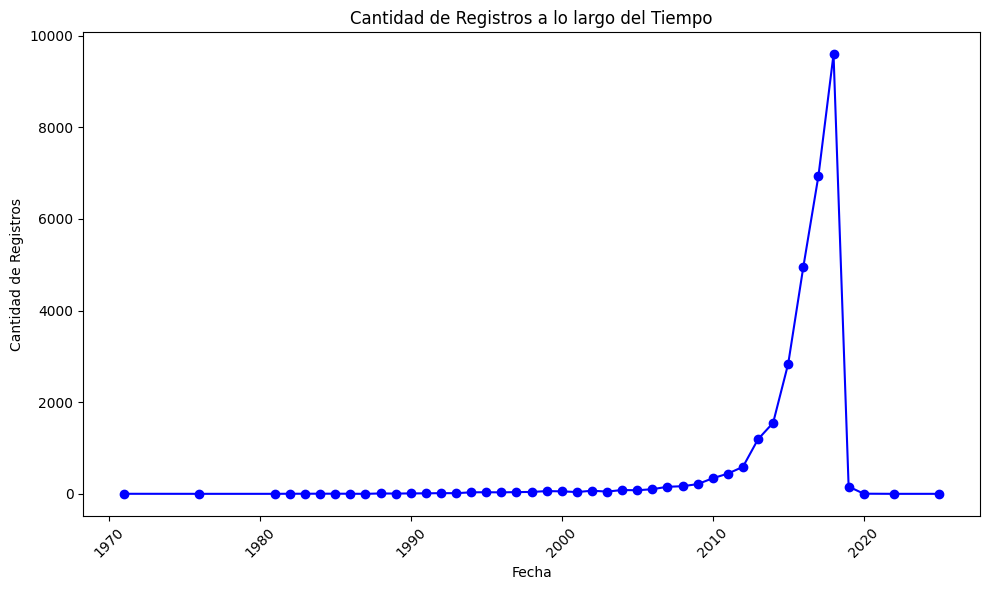

In [20]:

registros_por_mes = registros_por_fecha.resample('Y').sum()
registros_filtrados = registros_por_mes[registros_por_mes > 0]

plt.figure(figsize=(10, 6))
plt.plot(registros_filtrados.index, registros_filtrados.values, marker='o', color='b')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros a lo largo del Tiempo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Luka\AppData\Local\Temp\ipykernel_9668\2300544032.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  registros_por_mes = registros_por_fecha.resample('Y').sum()


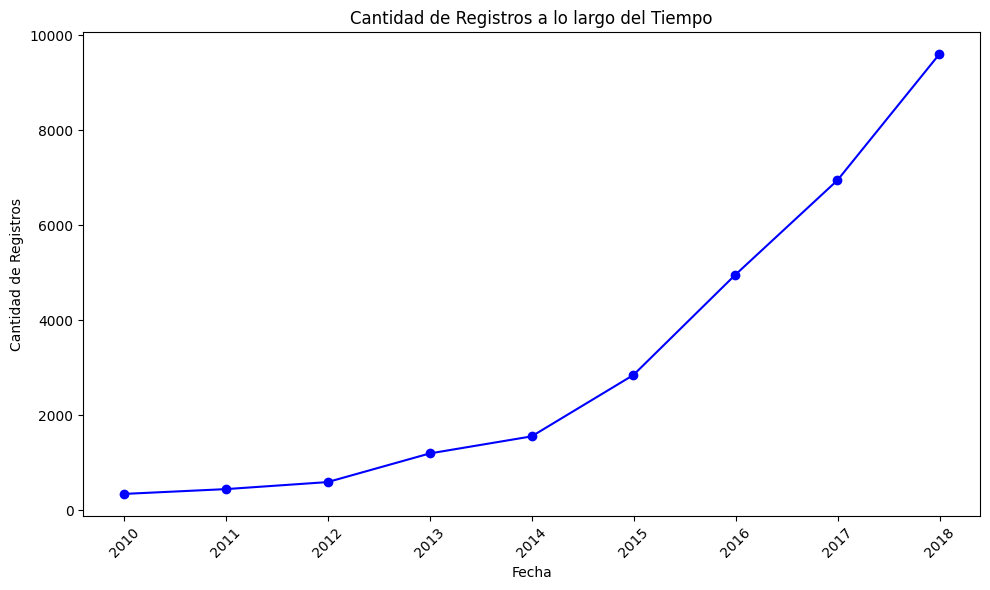

In [21]:
registros_por_mes = registros_por_fecha.resample('Y').sum()
registros_filtrados = registros_por_mes[registros_por_mes > 300]

plt.figure(figsize=(10, 6))
plt.plot(registros_filtrados.index, registros_filtrados.values, marker='o', color='b')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros a lo largo del Tiempo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

30437


<function matplotlib.pyplot.show(close=None, block=None)>

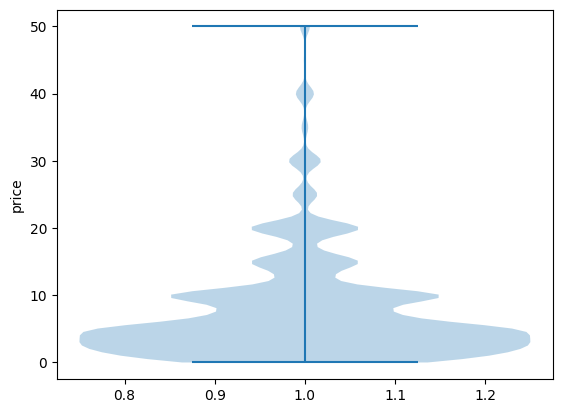

In [22]:
X = steam_df['price']
X = X[X < 50]
# X = X[X != 20]
print(X.__len__())
plt.violinplot(X)
plt.ylabel('price')
plt.show